<p align="left">
  <img src="https://wp.ufc.br/assets/sitiomodelo/brasao-2.png" alt="Imagen1" width="50"/>
  <img src="https://mmq.ufc.br/wp-content/uploads/2019/04/mmq-logo-oficial.png" alt="Imagen2" width="160"/>
</p>

## **Universidade Federal do Ceará**
### **Mestrado em Modelagem e Métodos Quantitativos**
## **Carlos Gutiérrez**
---

## Analise espacial da informação vectorial

In [ ]:
!pip install contextily -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 81.2 MB/s eta 0:00:00


In [ ]:
!pip install pysal -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
!pip install matplotlib-scalebar -q

In [ ]:
!pip install adjustText -q

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from adjustText import adjust_text
from pyproj import Transformer

In [ ]:
'''
Importando o dataset vectorial (pontos dos vendedores ambulantes)
'''

db = pd.read_csv('/content/drive/MyDrive/MMQ/Pesquisa/Detecção de vendedores ambulantes/data/data_alfanumerica_final/data_aprobada_antiguos.csv')

In [ ]:
#db

In [ ]:
#db.info()

In [ ]:
'''
Conferindo a informação geografica
'''

gdf_vendedores = gpd.GeoDataFrame(db, geometry = gpd.points_from_xy(db.UE_LON_GPS, db.UE_LAT_GPS), crs = 4326)
gdf_vendedores[['UE_LAT_GPS', 'UE_LON_GPS', 'ANOS_ESPACIO', 'TIPO_MOBILI', 'ANIO', 'MES', 'geometry']]

,UE_LAT_GPS,UE_LON_GPS,ANOS_ESPACIO,TIPO_MOBILI,ANIO,MES,geometry
0,10.982109,-74.777964,5.0,10.0,2025,3,POINT (-74.77796 10.98211)
1,7.894447,-72.508495,4.0,5.0,2025,3,POINT (-72.5085 7.89445)
2,6.254510,-75.567063,NaN,NaN,2025,3,POINT (-75.56706 6.25451)
3,4.664750,-74.066188,1.0,4.0,2025,3,POINT (-74.06619 4.66475)
4,6.240549,-75.588336,NaN,NaN,2025,3,POINT (-75.58834 6.24055)
...,...,...,...,...,...,...,...
183130,4.751718,-74.093306,2.0,4.0,2024,11,POINT (-74.09331 4.75172)
183131,11.377240,-72.242638,NaN,NaN,2024,11,POINT (-72.24264 11.37724)
183132,4.605247,-74.090073,3.0,3.0,2024,11,POINT (-74.09007 4.60525)
183133,3.462966,-76.481595,5.0,8.0,2024,11,POINT (-76.4816 3.46297)


In [ ]:
#gdf_vendedores = gdf_vendedores.to_crs(epsg = 4326)
gdf_vendedores.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## KDE vendedores ambulantes - Bogotá

In [ ]:
gdf_bogota = gpd.read_file('/content/drive/MyDrive/MMQ/Pesquisa/Detecção de vendedores ambulantes/data/data_vectorial_final/bogota_upl_urbano_epsg4326.gpkg')
gdf_bogota

,OBJECTID,Código_Un,Nombre,Acto_Admin,Número_Ac,Fecha_Acto,Normativa,Vocación,Observaci�,Área__Ha_,SHAPE.AREA,SHAPE.LEN,geometry
0,387,UPL13,Tintal,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano-Rural,None,1284.993710,0.001046,0.154174,"MULTIPOLYGON (((-74.14079 4.66266, -74.14073 4..."
1,388,UPL30,Salitre,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1578.491209,0.001285,0.144109,"MULTIPOLYGON (((-74.09471 4.66478, -74.10058 4..."
2,389,UPL22,Restrepo,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1075.501295,0.000876,0.143360,"MULTIPOLYGON (((-74.10459 4.56467, -74.10468 4..."
3,390,UPL31,Puente Aranda,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1731.114624,0.001410,0.161116,"MULTIPOLYGON (((-74.0832 4.6247, -74.084 4.623..."
4,391,UPL32,Teusaquillo,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1419.316994,0.001156,0.148314,"MULTIPOLYGON (((-74.0716 4.61775, -74.07283 4...."
5,392,UPL25,Usaquén,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1845.813288,0.001503,0.204452,"MULTIPOLYGON (((-74.02093 4.72971, -74.02106 4..."
6,393,UPL27,Niza,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1645.105218,0.001340,0.167370,"MULTIPOLYGON (((-74.07828 4.73386, -74.0775 4...."
7,394,UPL18,Kennedy,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1392.502506,0.001134,0.140844,"MULTIPOLYGON (((-74.12241 4.62903, -74.12369 4..."
8,395,UPL33,Barrios Unidos,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1190.345084,0.000969,0.121180,"MULTIPOLYGON (((-74.06413 4.65239, -74.06463 4..."
9,396,UPL29,Tabora,Dec,555,2021/12/29 00:00:00.000,En el marco del Decreto 555 del 29 de diciembr...,Urbano,None,1501.424592,0.001223,0.153672,"MULTIPOLYGON (((-74.09908 4.71754, -74.09886 4..."


In [ ]:
gdf_bogota.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

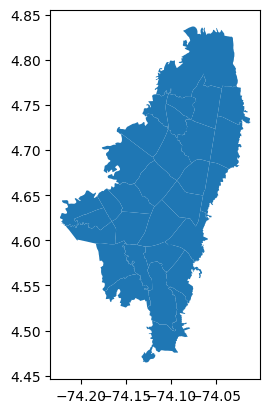

In [ ]:
gdf_bogota
gdf_bogota.plot()

<Axes: >

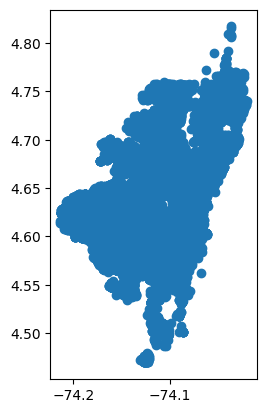

In [ ]:
'''
Armazena só os vendedores ambulantes que permanecem dentro do poligonos da cidade de Bogotá
'''

vendedores_bogota = gdf_vendedores.sjoin(gdf_bogota.geometry.to_frame(), predicate = 'within')
#vendedores_bogota = gpd.sjoin(gdf_vendedores, bogota_gdf, predicate = 'within')
vendedores_bogota.plot()

In [ ]:
'''
Mostrando alguns dados
'''
vendedores_bogota[['UE_LAT_GPS', 'UE_LON_GPS', 'LUGAR_FIJO', 'ANOS_ESPACIO', 'TIPO_MOBILI', 'ANIO', 'MES', 'geometry', 'index_right']]

,UE_LAT_GPS,UE_LON_GPS,LUGAR_FIJO,ANOS_ESPACIO,TIPO_MOBILI,ANIO,MES,geometry,index_right
3,4.664750,-74.066188,1.0,1.0,4.0,2025,3,POINT (-74.06619 4.66475),8
18,4.607701,-74.104930,2.0,5.0,4.0,2025,3,POINT (-74.10493 4.6077),3
19,4.607752,-74.104490,1.0,1.0,6.0,2025,3,POINT (-74.10449 4.60775),3
20,4.607636,-74.104472,NaN,NaN,NaN,2025,3,POINT (-74.10447 4.60764),3
23,4.613846,-74.214152,1.0,2.0,6.0,2025,3,POINT (-74.21415 4.61385),11
...,...,...,...,...,...,...,...,...,...
183121,4.503733,-74.104181,1.0,5.0,4.0,2024,11,POINT (-74.10418 4.50373),23
183123,4.604631,-74.086378,1.0,3.0,6.0,2024,11,POINT (-74.08638 4.60463),27
183125,4.511367,-74.114820,1.0,4.0,10.0,2024,11,POINT (-74.11482 4.51137),24
183130,4.751718,-74.093306,1.0,2.0,4.0,2024,11,POINT (-74.09331 4.75172),29


/usr/local/lib/python3.12/dist-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


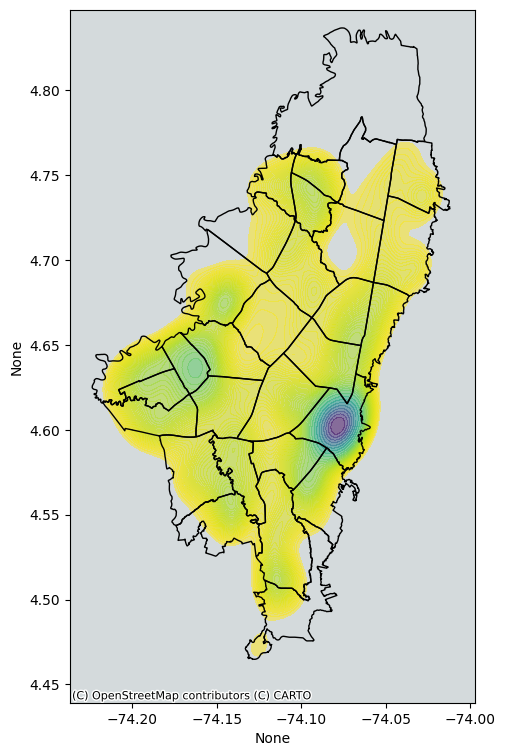

In [ ]:
'''
Plot da imagem KDE
'''

f, ax = plt.subplots(1, figsize = (9,9))
sns.kdeplot(
    x = vendedores_bogota.geometry.x,
    y = vendedores_bogota.geometry.y,
    data = vendedores_bogota,
    n_levels = 50,
    fill = True,
    alpha = 0.55,
    cmap = 'viridis_r',
)

gdf_bogota.boundary.plot(ax = ax, edgecolor="black", linewidth=1)

ctx.add_basemap(
    ax, source = ctx.providers.CartoDB.Positron
)

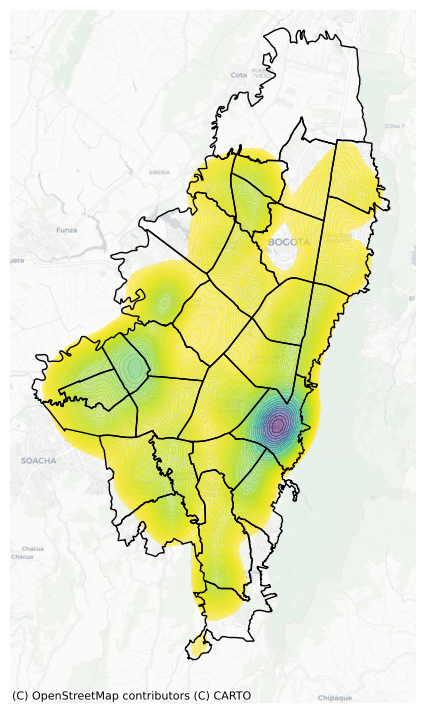

In [ ]:
'''
Mapa KDE com basemap
'''

# --- reproyectar a 3857 (Web Mercator) ---
vendedores_bogota_web = vendedores_bogota.to_crs(epsg=3857)
bogota_gdf_web = gdf_bogota.to_crs(epsg=3857)

# --- gráfico KDE ---
f, ax = plt.subplots(1, figsize=(9,9))

sns.kdeplot(
    x=vendedores_bogota_web.geometry.x,
    y=vendedores_bogota_web.geometry.y,
    data=vendedores_bogota_web,
    n_levels=60,
    fill=True,
    alpha=0.55,
    cmap="viridis_r",
    ax=ax
)

# --- borde del polígono ---
bogota_gdf_web.boundary.plot(ax=ax, edgecolor = "black", linewidth=1)

# --- añadir mapa base ---
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom = 12  # puedes ajustar 10–14 según quieras más/menos detalle
)

ax.set_axis_off()
#plt.show()

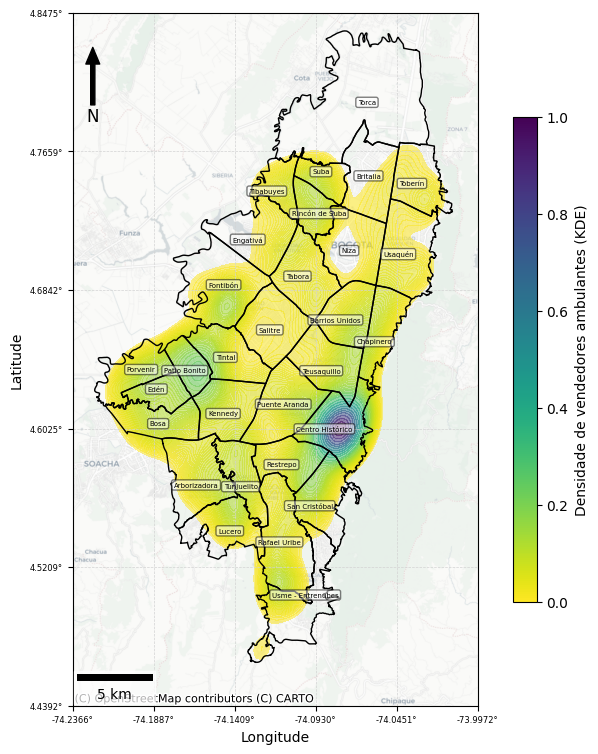

In [ ]:
'''
Mapa de KDE melhorado
'''

# --- reproyectar a 3857 (Web Mercator) ---
vendedores_bogota_web = vendedores_bogota.to_crs(epsg=3857)
bogota_gdf_web = gdf_bogota.to_crs(epsg=3857)

# --- gráfico KDE ---
f, ax = plt.subplots(1, figsize=(9,9))

kde = sns.kdeplot(
    x=vendedores_bogota_web.geometry.x,
    y=vendedores_bogota_web.geometry.y,
    data=vendedores_bogota_web,
    n_levels=60,
    fill=True,
    alpha=0.55,
    cmap="viridis_r",
    ax=ax
)

# --- borde del polígono ---
bogota_gdf_web.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# === Labels con atributo 'Nombre' ===
texts = []
for x, y, label in zip(bogota_gdf_web.geometry.representative_point().x,
                       bogota_gdf_web.geometry.representative_point().y,
                       bogota_gdf_web["Nombre"]):
    texts.append(ax.text(
        x, y, label,
        fontsize=5,
        ha="center", va="center",  # 👈 centrado en x,y
        bbox=dict(facecolor="white", alpha=0.5, boxstyle="round")
    ))

adjust_text(
    texts, ax=ax,
    #arrowprops=dict(arrowstyle="->", color='gray', lw=0.5)  # 👈 flecha desde centroide
)

# --- añadir mapa base ---
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=12
)



# === Barra de colores para el KDE ===
sm = plt.cm.ScalarMappable(cmap="viridis_r")
sm.set_array([])
cbar = f.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Densidade de vendedores ambulantes (KDE)")

# === Escala gráfica ===
scalebar = ScaleBar(1, units="m", location="lower left", box_alpha=0.7)
ax.add_artist(scalebar)

# === Norte ===
ax.annotate("N", xy=(0.05, 0.95), xytext=(0.05, 0.85),
            arrowprops=dict(facecolor="black", width=3, headwidth=10),
            ha="center", va="center", fontsize=12,
            xycoords=ax.transAxes)

# === Grilla de coordenadas ===

# === Definir transformador de 3857 → 4326 ===
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

# obtener límites actuales en 3857
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# generar ticks en 3857
xticks_3857 = np.linspace(xmin, xmax, 6)
yticks_3857 = np.linspace(ymin, ymax, 6)

# transformar a coordenadas WGS84 (long/lat)
xticks_wgs84, _ = transformer.transform(xticks_3857, np.repeat((ymin+ymax)/2, len(xticks_3857)))
_, yticks_wgs84 = transformer.transform(np.repeat((xmin+xmax)/2, len(yticks_3857)), yticks_3857)

# asignar ticks al mapa pero con etiquetas en grados
ax.set_xticks(xticks_3857)
ax.set_xticklabels([f"{val:.4f}°" for val in xticks_wgs84], fontsize = 6)

ax.set_yticks(yticks_3857)
ax.set_yticklabels([f"{val:.4f}°" for val in yticks_wgs84], fontsize = 6)

# dibujar grilla
ax.grid(color="lightgray", linestyle="--", linewidth=0.5)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
#plt.title("Kernel Density de vendedores en Bogotá", fontsize=14)

plt.savefig("kde_bogota.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
plt.savefig('kde_bogota.pdf')

<Figure size 640x480 with 0 Axes>

## Densidade de vendedores ambulantes - Tunja

In [ ]:
gdf_tunja = gpd.read_file('/content/drive/MyDrive/MMQ/Pesquisa/Detecção de vendedores ambulantes/data/data_vectorial_final/tunja_sectores_urbano_epsg4326.gpkg')
gdf_tunja

,id,sector,area,areas,zonificaci,geometry
0,7,Sector 7,1.817731e+06,181.773061,None,"MULTIPOLYGON (((-73.34773 5.56233, -73.34796 5..."
1,6,Sector 6,2.443244e+06,244.324388,None,"MULTIPOLYGON (((-73.36162 5.55251, -73.36143 5..."
2,5,Sector 5,1.631310e+06,163.131022,None,"MULTIPOLYGON (((-73.35592 5.5378, -73.35561 5...."
3,2,Sector 2,2.002111e+06,200.211139,None,"MULTIPOLYGON (((-73.37186 5.53433, -73.37179 5..."
4,8,Sector 8,2.346532e+06,234.653180,None,"MULTIPOLYGON (((-73.35467 5.53373, -73.35465 5..."
5,4,Sector 4,2.257559e+00,225.755931,None,"MULTIPOLYGON (((-73.34945 5.54108, -73.34922 5..."
6,3,Sector 3,1.571117e+06,157.111651,None,"MULTIPOLYGON (((-73.35373 5.51446, -73.3538 5...."
7,1,Sector 1,2.132954e+06,213.295435,None,"MULTIPOLYGON (((-73.3656 5.51935, -73.36517 5...."
8,10,Sector 10,1.167756e+06,116.775587,None,"MULTIPOLYGON (((-73.35424 5.56558, -73.35346 5..."
9,9,Sector 9,3.507122e+06,350.712193,None,"MULTIPOLYGON (((-73.33658 5.57904, -73.33587 5..."


<Axes: >

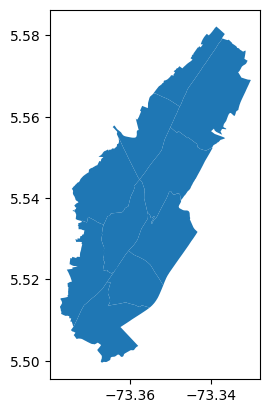

In [ ]:
gdf_tunja
gdf_tunja.plot()

<Axes: >

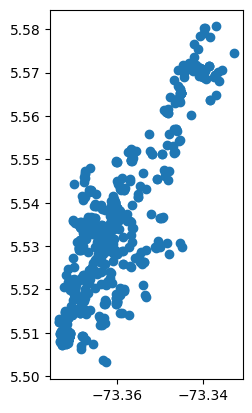

In [ ]:
vendedores_tunja = gdf_vendedores.sjoin(gdf_tunja.geometry.to_frame(), predicate = 'within')
vendedores_tunja.plot()

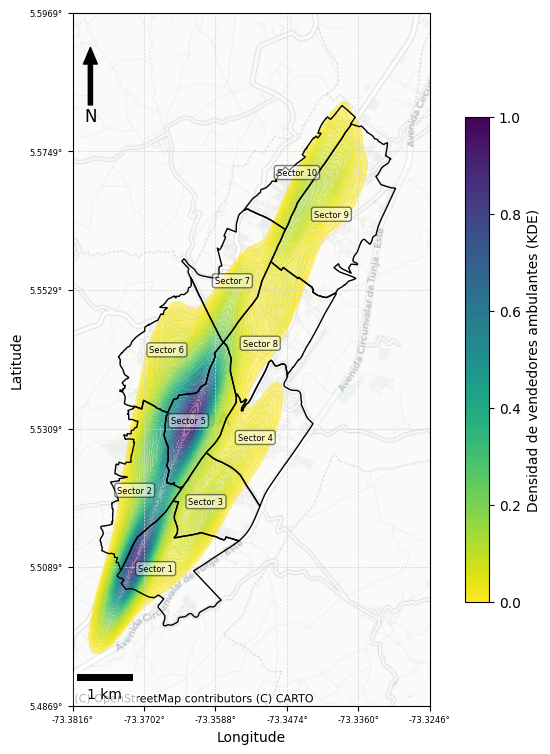

In [ ]:
# --- reproyectar a 3857 (Web Mercator) ---
vendedores_tunja_web = vendedores_tunja.to_crs(epsg=3857)
tunja_gdf_web = gdf_tunja.to_crs(epsg=3857)

# --- gráfico KDE ---
f, ax = plt.subplots(1, figsize=(9,9))

kde = sns.kdeplot(
    x=vendedores_tunja_web.geometry.x,
    y=vendedores_tunja_web.geometry.y,
    data=vendedores_tunja_web,
    n_levels=60,
    fill=True,
    alpha=0.55,
    cmap="viridis_r",
    ax=ax
)

# --- borde del polígono ---
tunja_gdf_web.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# === Labels con atributo 'Nombre' ===
texts = []
for x, y, label in zip(tunja_gdf_web.geometry.representative_point().x,
                       tunja_gdf_web.geometry.representative_point().y,
                       tunja_gdf_web["sector"]):
    texts.append(ax.text(
        x, y, label,
        fontsize=6,
        ha="center", va="center",
        bbox=dict(facecolor="white", alpha=0.5, boxstyle="round")
    ))

adjust_text(texts, ax=ax)

# --- añadir mapa base ---
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=13
)

# === Barra de colores para el KDE ===
sm = plt.cm.ScalarMappable(cmap="viridis_r")
sm.set_array([])
cbar = f.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Densidad de vendedores ambulantes (KDE)")

# === Escala gráfica ===
scalebar = ScaleBar(1, units="m", location="lower left", box_alpha=0.7)
ax.add_artist(scalebar)

# === Norte ===
ax.annotate("N", xy=(0.05, 0.95), xytext=(0.05, 0.85),
            arrowprops=dict(facecolor="black", width=3, headwidth=10),
            ha="center", va="center", fontsize=12,
            xycoords=ax.transAxes)

# === Grilla de coordenadas en WGS84 ===
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

# obtener límites actuales en 3857
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# generar ticks en 3857
xticks_3857 = np.linspace(xmin, xmax, 6)
yticks_3857 = np.linspace(ymin, ymax, 6)

# transformar a coordenadas WGS84
xticks_wgs84, _ = transformer.transform(xticks_3857, np.repeat((ymin+ymax)/2, len(xticks_3857)))
_, yticks_wgs84 = transformer.transform(np.repeat((xmin+xmax)/2, len(yticks_3857)), yticks_3857)

# asignar ticks al mapa pero con etiquetas en grados decimales
ax.set_xticks(xticks_3857)
ax.set_xticklabels([f"{val:.4f}°" for val in xticks_wgs84], fontsize = 6)

ax.set_yticks(yticks_3857)
ax.set_yticklabels([f"{val:.4f}°" for val in yticks_wgs84], fontsize = 6)

# dibujar grilla
ax.grid(color="lightgray", linestyle="--", linewidth=0.5)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
#plt.title("Kernel Density de vendedores en Tunja", fontsize=14)

plt.savefig("kde_tunja.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
